# Pairwise correlation for robust feature selection

* Feature selection is important to remove redundant features, reduce model complexity, and avoid overfitting
* Some techniques focus on removal of features based on individual properties
* Pairwise correlation examines the connection between features and decides if they are worth keeping


### Pearson's correlation coefficient

* Quantifies the linear relationship between two distributions (or features) in a single metric
* Symbol is `r` with range [-1, 1]
  * -1 is a perfect negative correlation
  * +1 is a perfect positive correlation
  * strong correlation: 0.7 <= |r| < 1.0
  * moderate correlation: 0.3 <= |r| < 0.7
  * weak correlation: 0.0 <= |r| < 0.3


### How Pearson correlation is used in feature selection

* Let's say that the Pearson correlation between two feaures is 0.85
* This means that 85% of the time, you can predict feature 2 by using the values of feature 1
* If you have feature 1 in your dataset, feature 2 is not adding much information
* You can remove feature 2 since it only adds more complexity to our trained model
* Pairwise correlation identifies groups of highly correlated features and only keeps one of them
* The model has high predictive power using fewer features


### How to identify highly correlated features

* Plot a correlation matrix

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def correlation_matrix(df: pd.DataFrame, figsize):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
    
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, ax=ax)

### Load dataset

* Melborne, Australia dataset

In [4]:
FILE_PATH = "/workspaces/feature_selection/data/"
houses = pd.read_csv(FILE_PATH + "Melbourne_housing_FULL.csv")
houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### EDA

* Identify numerical and categorical features

In [14]:
# Numerical features
numerical_features = houses.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features)

# Categorical features
categorical_features = houses.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:')
print(categorical_features)

houses_numerical = houses[numerical_features]
houses_numerical.head()

There are 13 numerical features:
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
There are 8 categorical features:
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


### Plot correlation matrix

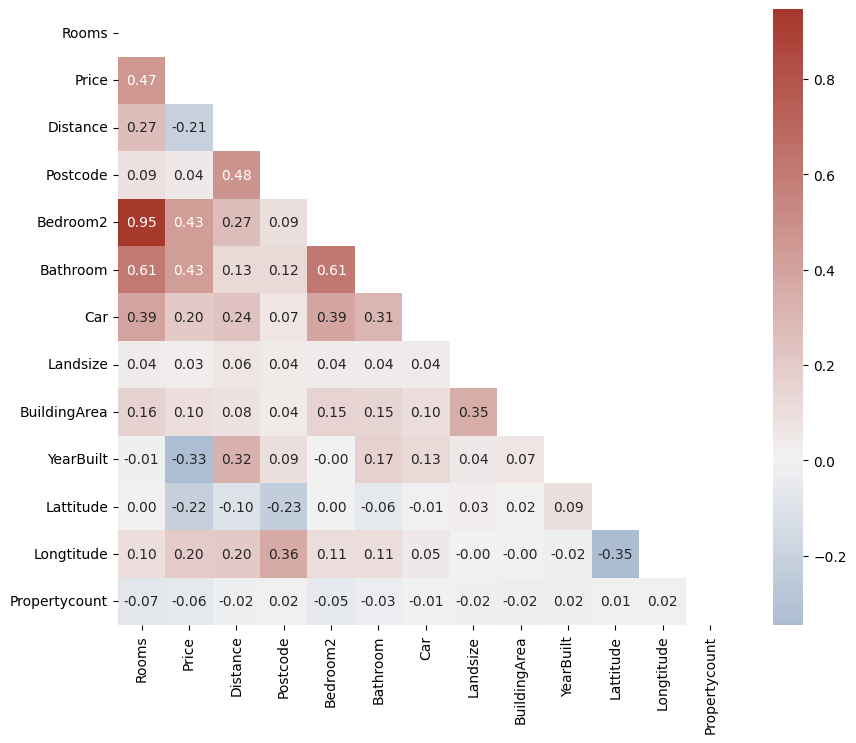

In [25]:
correlation_matrix(houses_numerical, figsize=(10, 8))

### Removing highly correlated features

* The correlation matrix is a great visual summary of our pairs of features
* Can use it to eliminate features
* However, what if we have a large dataset with many features? We could not visualize it
* Example is the Ansur dataset